In [1]:
import pandas as pd
import numpy as np
import thinkplot
import thinkstats2
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Analytical Distributions

We can use analytical distributions to help us learn from our data, and to build towards using our data as a tool. 

Here we can start by using an analytical distribution to build a model that will help us to predict the daily investment return on the stock price of Microsoft. 


# 分析分佈

我們可以使用分析分佈來幫助我們從數據中學習，並朝著將數據用作工具的方向發展。

在這裡，我們可以從使用分析分佈開始構建一個模型，

該模型將幫助我們預測 Microsoft 股票價格的每日投資回報。

In [2]:
#Load data, loose the excess
df = pd.read_csv('data/MSFT.csv')
df = df[['Date', 'Close']]
df.head()

,Date,Close
0,2018-01-01,88.190002
1,2018-01-08,89.599998
2,2018-01-15,90.000000
3,2018-01-22,94.059998
4,2018-01-29,91.779999


#### Data Preparation

We need to change the original data into the daily return. This code uses the diff() function to calculate the difference in price from yesterday to today. This daily gain/loss is then divided by the closing price to produce the daily percentage return, which is what we will look at. 

#### 數據準備

我們需要將原始數據更改為每日收益。 

此代碼使用 diff() 函數計算從昨天到今天的價格差異。 

然後將每日收益/損失除以收盤價以產生每日百分比回報，這就是我們要看的內容。

In [3]:
#Do a little manipulation to get the return
df['diff'] = pd.Series(np.diff(df['Close']))
df['return'] = df['diff'] / df['Close']
df = df[['Date', 'return']].dropna()
df.head()

,Date,return
0,2018-01-01,0.015988
1,2018-01-08,0.004464
2,2018-01-15,0.045111
3,2018-01-22,-0.024240
4,2018-01-29,-0.039224


Our new table is the daily return - i.e. if we invested in MSFT one day, what would the return be from my investment from one day to the next. 

The first two days can be taken as an example:
    - From day 1 to day 2 the price goes up apx $1.4
    - $1.4 dollars is approximately 1.6% of the first day price - ~$88
    - So if you invested on day one, you'd gain about 1.6%, or .016 <- That's the return value. 

We can do some of our graphing to take a little look-see and try to determine if this new distribution is normal:

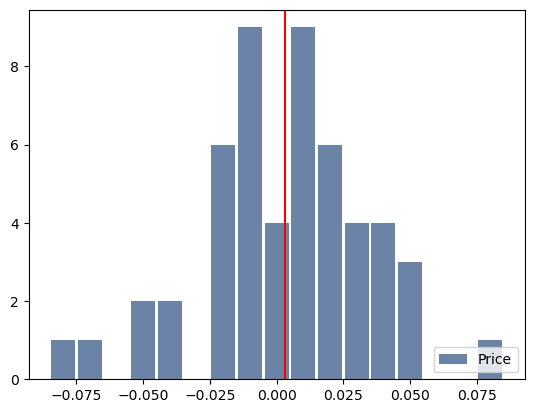

In [51]:
#Histogram + mean line
hi = thinkstats2.Hist(round(df["return"], 2), label="Price")
thinkplot.Hist(hi)
plt.axvline(df['return'].mean(), color = 'red')
thinkplot.Config()

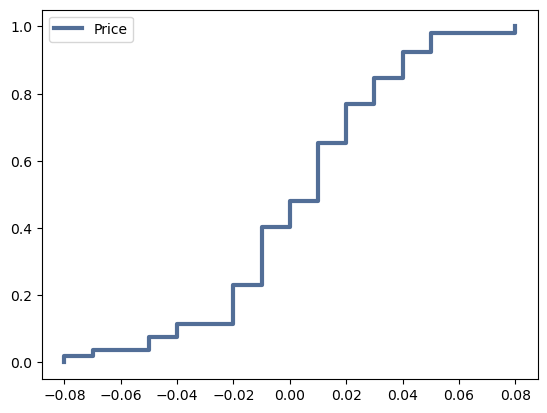

In [5]:
#CDF look
hi_c = thinkstats2.Cdf(hi)
thinkplot.Cdf(hi_c)
thinkplot.Config()

In [52]:
# how many precentage of we might loosing money: 48%
hi_c.Prob(0)

0.4807692307692308

### Check for Normality

These charts look semi-normal, but not totally. Examine the probability plot to see it a bit closer. 

The thinkstats2 file provides this easy to use probability plot function. The book (pg 63ish) has the steps to make this broken out a little bit more. 

The most simple way I can think of to explain it is that it compares if the middle values are near the mean, the low values are near the low, and the high values are near the high. The model line is what we'd expect if the data was perfectly normal, in this one the middle values are close, the low values are a little lower than expected, the high values are a little lower than expected. 

In English, it is more or less normal for values close to the mean, but the values (the actual % return values) on either end of the distribution are a bit lower than we'd expect if it was normal. 

### 檢查正態性

這些圖表看起來半正常，但不完全正常。 

檢查概率圖以更仔細地觀察它。

thinkstats2 文件提供了這種易於使用的概率圖函數。

這本書 (pg 63ish) 有一些步驟可以讓這個更詳細一點。

我能想到的最簡單的解釋方法是比較中間值是否接近平均值，低值是否接近低值，以及高值是否接近高值。 

如果數據完全正常，模型線就是我們所期望的，在這個模型中，中間值接近，低值略低於預期，高值略低於預期。

在英語中，接近平均值的值或多或少是正常的，但分佈兩端的值（實際返回值百分比）比我們預期的要低一點，如果它是正常的。

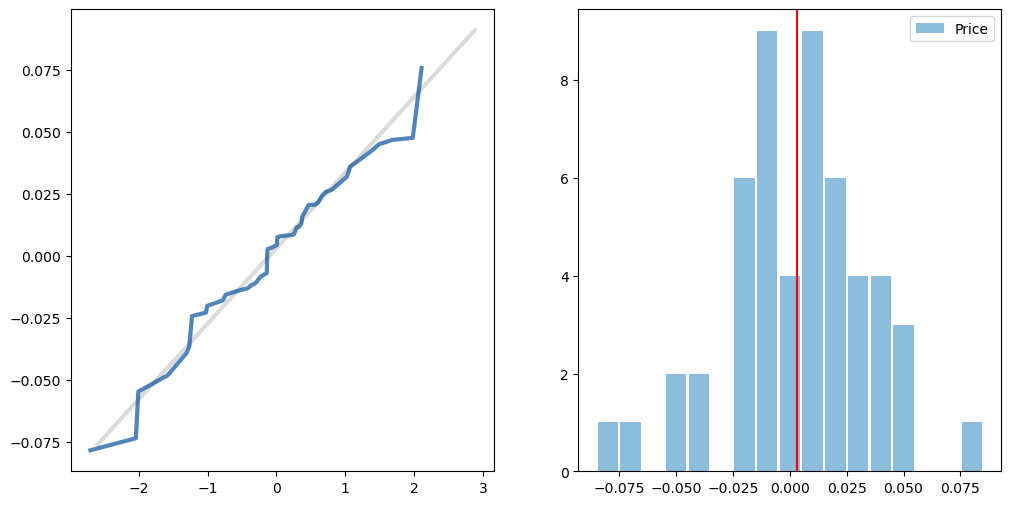

In [53]:
#Create probability plot
thinkplot.clf()
thinkplot.PrePlot(2, 1, 2)
thinkstats2.NormalProbabilityPlot(df["return"])
thinkplot.SubPlot(2)
thinkplot.Hist(hi)
plt.axvline(df['return'].mean(), color = 'red')
thinkplot.Config()

#### Normality Check

The normal probability plot is constructed is a somewhat complex way, that we don't really care about, the interpretation is relatively simple though. 
<ul>
<li> The normal probability plot compares theoretical (i.e. a real normal distribution) values (in Z scores) on the x-axis, vs real quantities on the y-axis. 
<li> The straight reference line is a real normal distributions. 
<li> The dots/other line is our data. 
<li> <b> We read the graph by comparing the blue line to the grey line:</b>
    <ul>
    <li> If the blue line is overlapping the grey, that shows us that at that point on the x-axis (distance from mean), that the real data "matches" what we expect from a normal distribution. 
    <li> If the blue line is lower than the grey, that shows that at that point on the x-axis, the real data is lower than we'd expect if the distribution was perfectly normal. 
    <li> If the blue line is higher than the grey, that shows that at that point on the x-axis, the real data is higher than we'd expect if the distribution was perfectly normal. 
    </ul>
</ul>

<b>So a perfectly normal distribution will lie right on top of the grey line. The more separation from the grey, the "less normal" our data is.</b>

Does this one match the line? Is it normal? Ehhhhh.... kind of. The highest and lowest values are both lower than expected. For values near the mean, it is pretty close. 

We can live on the wild side, assume that it is close enough to normal, and 'use' that normality to do some stuff. 

#### 常態性檢查

正態概率圖的構建方式有點複雜，我們並不關心，但解釋相對簡單。
<ul>
<li> 正態概率圖比較 x 軸上的理論（即真實正態分佈）值（以 Z 分數表示）與 y 軸上的實際數量。
<li> 直線參考線是一個真正的正態分佈。
<li> 點/其他線是我們的數據。
<li> <b> 我們通過比較藍線和灰線來閱讀圖表：</b>
     <ul>
     <li> 如果藍線與灰線重疊，則表明在 x 軸上的那個點（距均值的距離），真實數據“符合”我們對正態分佈的預期。
     <li> 如果藍線低於灰色線，則表明在 x 軸上的那個點，如果分佈完全正態，則實際數據低於我們的預期。
     <li> 如果藍線高於灰線，則表明在 x 軸上的那個點，如果分佈完全正態，則實際數據高於我們預期的數據。
     </ul>
</ul>

<b>因此，完全正態分佈將位於灰線的正上方。 與灰色的分離度越高，我們的數據就越“不正常”。</b>

這個符合線嗎？ 正常嗎？ 呃……有點。 最高值和最低值均低於預期。 對於接近平均值的值，它非常接近。

我們可以生活在狂野的一面，假設它足夠接近正常，然後“利用”這種正常來做一些事情。

### The Power of Being Normal

One of the super useful things about these analytical distributions is the simplicity. A normal curve is always the same basic shape, so all we need to do to create one is to know the mean (mu) and standard deviation (sigma). This allows us to easily extrapolate from what we know, and use all the attributes of the normal distribution. Again, this is an approximation, it is not bang on, but that is useful in a lot of cases. 

The fact that the data in our emperical sample will follow (we hope) that normal distribution pattern, we can apply all of the general knowledge of normal distributions to our situation - the knowledge that X% will fall within certain standard deviation ranges, the ability to infer percentiles, etc... This works even if we don't have a massive sample of data that would allow us to generate those distribution patterns from scratch. 

While everything in the world isn't normal, many things are, and that knowledge helps us substantially. We can safely assume things such as blood pressure are normally distributed, so if you are able to take a small sample of blood pressure from the population you're looking at, calculate the mean, count, and variance, and create an analytical distribution that you can generalize from confidently. 

### 正常的力量

這些分析分佈的超級有用之處之一就是簡單。 

正態曲線始終具有相同的基本形狀，因此創建一條正態曲線所需要做的就是知道均值 (mu) 和標準差 (sigma)。 

這使我們能夠輕鬆地根據已知信息進行推斷，並使用正態分佈的所有屬性。 

再次強調，這是一個近似值，不是很理想，但在很多情況下都很有用。

事實上，我們的經驗樣本中的數據將遵循（我們希望）正態分佈模式，我們可以將正態分佈的所有一般知識應用於我們的情況 - X% 將落在某些標準偏差範圍內的知識，

能力 推斷百分位數等......即使我們沒有大量數據樣本可以讓我們從頭開始生成這些分佈模式，這也是可行的。

雖然世界上的一切都不正常，但很多事情都是正常的，而這些知識對我們有很大幫助。 

我們可以安全地假設諸如血壓之類的東西是正態分佈的，所以如果你能夠從你正在查看的人群中抽取一小部分血壓樣本，

計算均值、計數和方差，並創建一個分析分佈 你可以自信地概括。

#### The Predictive Power of Analytical Distributions

One of the things that our analytical distribution relationship allows us to do is to have a pattern from which to make predictions from. For example, if we find that our daily return data:
<ul>
<li> Is normally distributed. 
<li> Has a mean and a standard distribution that we can calculate.
</ul>

We can then use that information to help us predict - for example if a day trader is trading MSFT stock and he notices that some shares he purchased earlier in the day are up an amount equal to 3 standard deviations in the normal distribution of the daily gain, that would tell the trader that his daily gain is above ~99% of all daily increases in the stock, so it is pretty likely they are in a good position to sell. This isn't definitive of course, the stock could skyrocket, but the more data we have and the better the data fits our model, the more accurate our predictions can be. This is a key concept of machine learning. 


#### 分析分佈的預測能力

我們的分析分佈關係允許我們做的一件事是擁有一個模式，從中進行預測。 例如，如果我們發現我們的每日回報數據：
<ul>
<li> 呈正態分佈。
<li> 具有我們可以計算的均值和標準分佈。
</ul>

然後我們可以使用該信息來幫助我們進行預測 - 

例如，如果日間交易員正在交易 MSFT 股票，並且他注意到他當天早些時候購買的一些股票上漲了相當於每日收益正態分佈的 3 個標準差的金額 ，

這將告訴交易者他的每日收益超過股票所有每日漲幅的 99%，因此他們很可能處於賣出的有利位置。 

這當然不是確定的，股票可能會飆升，但我們擁有的數據越多，數據越適合我們的模型，我們的預測就越準確。 這是機器學習的一個關鍵概念。

### Samples

On thing we see here, and something that is common as we go, is taking a sample from a distribution. In this case we've created a normal distribution based on the emperical data's statistics. This distribution object isn't a dataset, it is a mathmatical representation of the distribution. 

Below, we want to graph our analytical distribution and compare it to the analytical one. To do so, we take a random sample of values that are generated from the distribution. Here we ask the distribution, "give me 10,000 values that fit the distribution that is in its settings". The distribution generates random numbers following the distribution pattern. The exact set of values that we get will be different each time, they are random; as we generate a large number, they will trend towards more closely following the "expectation" of the distribution. 

This idea of sampling will factor into what we do in the near future in important ways, of note:
<ul>
<li> When we are extracting a sample from a population, we need to evaluate if our sample is representitive of the population. 
<li> We can generate multiple samples, and count how likely it is to see certain values. This is how the +/- 5%, 19 times out of 20 thing that you see on polling results is derived. 
</ul>

### 樣品

我們在這裡看到的事情是從分佈中抽取樣本，這在我們進行時很常見。 

在這種情況下，我們根據經驗數據的統計數據創建了一個正態分佈。 這個分佈對像不是數據集，它是分佈的數學表示。

下面，我們要繪製我們的分析分佈圖並將其與分析分佈進行比較。 

為此，我們隨機抽取從分佈中生成的值樣本。 在這裡我們詢問分佈，“給我 10,000 個符合其設置中的分佈的值”。 

分佈按照分佈模式生成隨機數。 我們每次得到的確切值集都會不同，它們是隨機的； 隨著我們生成大量數據，它們將趨向於更接近於分佈的“預期”。

這種抽樣的想法將在不久的將來以重要的方式影響我們所做的事情，值得注意的是：
<ul>
<li> 當我們從總體中提取樣本時，我們需要評估我們的樣本是否能代表總體。
<li> 我們可以生成多個樣本，併計算看到某些值的可能性。 
這就是您在投票結果中看到的 +/- 5%、20 次中的 19 次的派生方式。
</ul>

In [7]:
#Create a normal distribution based on the characteristics of the kinda-normal data
import scipy.stats
mu = df["return"].mean()
sigma = df["return"].std()
normz = scipy.stats.norm(mu, sigma)

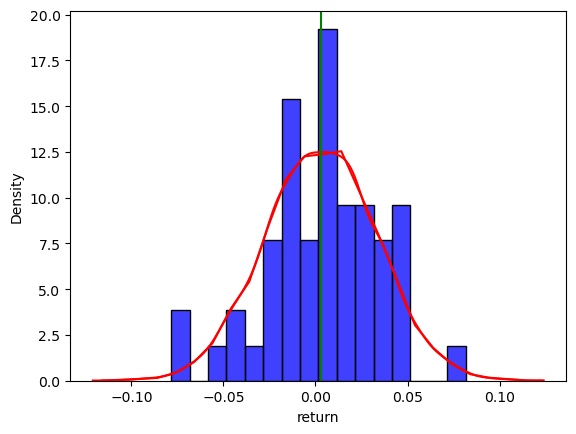

In [8]:
# the blue one is Empirical data 經驗數據。
# the red line is analytical distribution 解析分佈。
# the green line is the mean of data.
import seaborn as sns
sns.histplot(data=df["return"], binwidth=.01, color="blue", stat="density")
sns.histplot(data=normz.rvs(10000), binwidth=.01, color="red", stat="density", kde=True, element="poly", fill=False)
plt.axvline(mu, color="green")

#### Distribution Exercises

we can use the analytical distrubiton to do our CDF calculations.

In [9]:
#How many weekly returns are greater than 5%, but less than 10%?
lowVal = normz.cdf(.05)
hiVal = normz.cdf(.1)
print(str(lowVal) + " : " + str(hiVal))
print(hiVal-lowVal)

0.9355110908938288 : 0.9991544890514654
0.06364339815763664


In [10]:
normz.cdf(0)

0.45880600312056974

### Test Normality Analytically

We have done our normality tests by visually inspecting the distribution. This works quite well, and we can rely on it going forward. There is also a way to do a normality test analytically. 

We'll do more on hypothesis testing later on, this is one example of it. We are basically doing a test that says, "do we have evidence that this data comes from a normal distribution?". The actual calculation is based on two things we'll look at more later - skew (left/right shift of distribution) and kurtosis (steepness of the peak of the distribution)

<b>Note:</b> this analytical test is not necessarily better than the visual one. The visual one is good, and if I am doing something, I would generally use that. In particular, it is much more informative if you have data that may be mostly normal, but differs largely due to something like a few outliers. We can see this visually when inspecting the normality, and take action like filter the outlier out. This test can be scripted, so automated processes can be created; as well, if a distribution is closer to a normal distribution pattern, this test will measure those small differences with more precision than the visual method. 

### 分析測試正態性

我們通過目測分佈來完成正態性測試。 這工作得很好，我們可以依靠它繼續前進。

 還有一種方法可以分析地進行正態性檢驗。

稍後我們會做更多關於假設檢驗的工作，這就是其中一個例子。 

我們基本上是在做一個測試，說“我們有證據表明這些數據來自正態分佈嗎？”。 

實際計算基於我們稍後會看到的兩件事 - 偏斜（分佈的左/右偏移）和峰度（分佈峰值的陡度）

<b>注意：</b> 此分析測試不一定優於視覺測試。 

視覺效果很好，如果我正在做某事，我通常會使用它。 

特別是，如果您的數據可能大部分是正常的，但由於一些異常值等原因而有很大差異，那麼它會提供更多信息。 

我們可以在檢查正態性時直觀地看到這一點，並採取措施，如過濾掉異常值。 

該測試可以編寫腳本，因此可以創建自動化流程； 

同樣，如果分佈更接近正態分佈模式，則此測試將比視覺方法更精確地測量這些微小差異。

In [54]:
#Check Normality with code
# k2 is not important, use it to calculate the P-value
k2, p = scipy.stats.normaltest(df["return"])
p

0.23901164802625616

In [55]:
# If we were to write out our decision...
# 零假設：x來自正態分佈
alpha = .05
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected") # 零假設可以被拒絕
else:
    print("The null hypothesis cannot be rejected") # 零假設不能被拒絕

The null hypothesis cannot be rejected


Hypothesis tests are framed in terms of rejecting or accepting a Null Hypothesis. Here our null hypothesis is "the data is normally distributed". Our test generates a value that measures (effectively) how confident we can be in rejecting that null hypothesis (the "p" value). Below, we check if that result meets our cutoff for confidence; the cutoff is commonly .05, but it varies (we'll look at it more later). 

In this case, if our p-value is <.05, that meets our confidence cutoff for rejecting the NH, or stating that the data is not normal. If it is higher, we can't be all that confident, so we accept the hypothesis that the data is normal. A lower p value would require that we are more confident that we can reject the NH, a higher p value would require us to be less confident. 

假設檢驗是根據拒絕或接受零假設來構建的。 這裡我們的原假設是“數據呈正態分佈”。 

我們的測試生成一個值，該值可以（有效地）衡量我們在拒絕原假設（“p”值）方面的信心。 

下面，我們檢查該結果是否符合我們的置信度； 截止值通常為 0.05，但它會有所不同（我們稍後會詳細介紹）。

在這種情況下，如果我們的 p 值 <.05，則滿足我們拒絕 NH 或聲明數據不正常的置信度截止值。 

如果它更高，我們就不能那麼自信，所以我們接受數據正常的假設。 

較低的 p 值將要求我們更有信心拒絕 NH，較高的 p 值將要求我們不那麼自信。

### Exercise #1

Now try one...

<ul>
<li>Check and see if NFL weights data fits a normal dist.
<li>Create a normal analytical distribution based off of the emperical data.
<li>What percentage of people are between 265 and 325? 
    <ul>
    <li>Using the empirical?
    <li>Using the analytical?
    </ul>
<li>What percentage of people are greater than your weight, using both distributions?
</ul>

If you're fast, try with NBA Weights

<li>What percentage of people are between 265 and 325? (using both distributions)
the steps on how to solve: 


check if empirical data matches the normal distribution pattern.
1. check the shape directly, the histogram and PMF
2. check the probability plot

if it matches, create an analytical distribution matching the data.
1. Calculate the stats needed to make a distribution - mean and standard deviation.
2. use scipy.stats.norm to create the distribution from the two statistics.
(nflN = scipy.stats.norm(mu1,sigma1))

use each to answer the question.
1. generate CDF from empirical data, and use percentile/ probability functions to get answers.
2. call the CDF function on the analytical distribution to get the answer.
3. compare the answers from the two methods.

<li>265 歲到 325 歲之間的人所佔百分比是多少？ (使用二種分佈)

檢查經驗數據是否符合正態分佈模式。

1. 直接檢查形狀，直方圖和PMF

2. 檢查概率圖


如果匹配，則創建匹配數據的分析分佈。

1. 計算進行分佈所需的統計數據 - 均值和標準差。

2. 使用 scipy.stats.norm 從兩個統計數據創建分佈。
(nflN = scipy.stats.norm(mu1,sigma1))


用每一個來回答問題。

1. 從經驗數據生成 CDF，並使用百分位數/概率函數得到答案。

2. 調用解析分佈的CDF函數得到答案。

3. 比較兩種方法的答案。

In [13]:
#Load data, filter out junk, put in series
dfNFL = pd.read_csv("data/NFL.csv")
dfNFL = dfNFL[dfNFL["Weight (lbs)"] > 100]
nfl = pd.Series(dfNFL["Weight (lbs)"])
nfl.head()

0    185.0
1    235.0
2    230.0
3    255.0
4    305.0
Name: Weight (lbs), dtype: float64

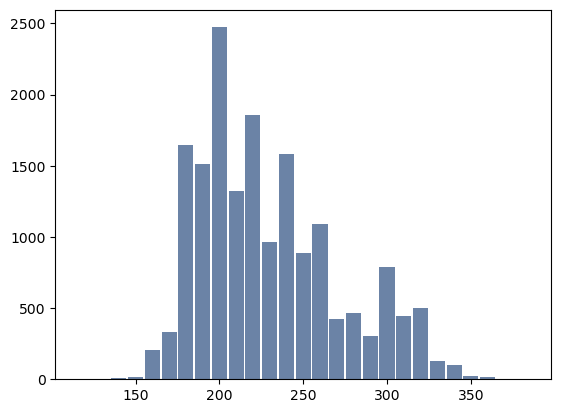

In [14]:
#Histogram 1
nflh = thinkstats2.Hist(round(nfl, -1))
thinkplot.Hist(nflh)
thinkplot.Config()

<AxesSubplot:xlabel='Weight (lbs)', ylabel='Count'>

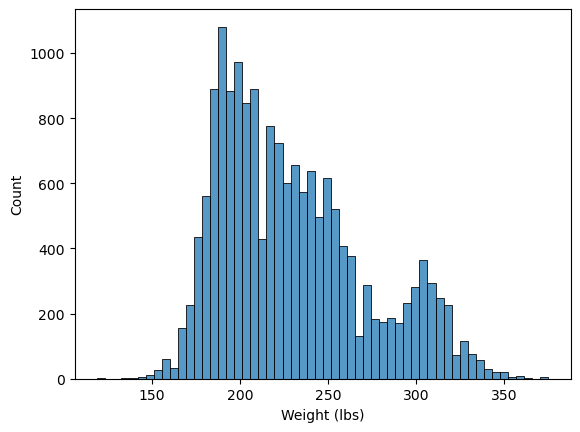

In [58]:
# histogram 2
sns.histplot(nfl)

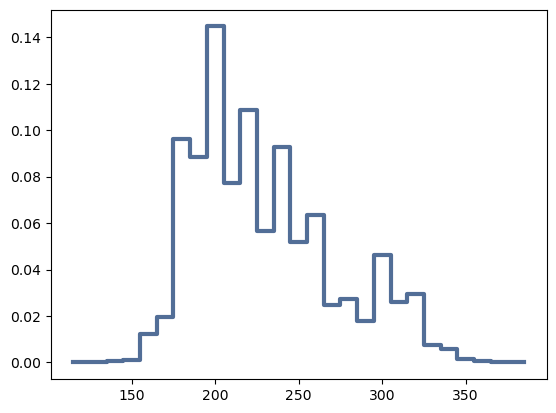

In [15]:
#PMF
nflp = thinkstats2.Pmf(round(nfl, -1))
thinkplot.Pmf(nflp)
thinkplot.Config()

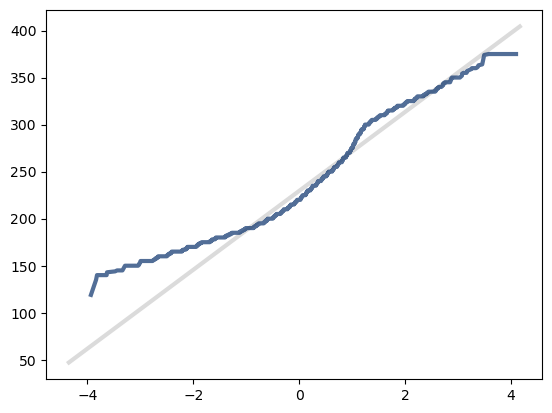

In [16]:
# check Normal Probability Plot
thinkplot.clf
thinkstats2.NormalProbabilityPlot(nfl)

In [56]:
#Make analytical distribution
mu1 = nfl.mean()
sigma1 = nfl.std()  # also: sigma1 = np.std(nfl)
mu1, sigma1
nflN = scipy.stats.norm(mu1,sigma1)

{'xscale': 'linear', 'yscale': 'linear'}

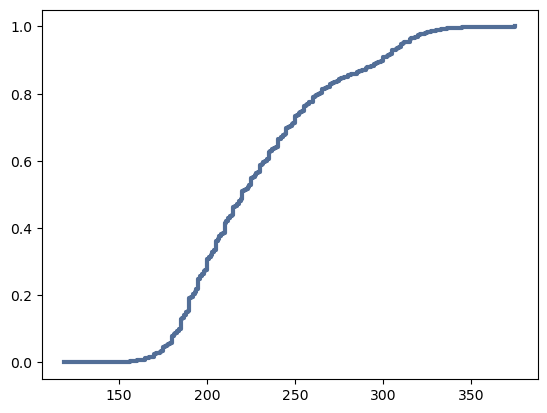

In [59]:
#Make an emperical CDF
nfl_cdf = thinkstats2.Cdf(nfl)
thinkplot.Cdf(nfl_cdf)

In [60]:
# calculate the answer
# What percentage of people are between 265 and 325
a1 = nfl_cdf.Prob(325)
a2 = nfl_cdf.Prob(265)
a1 - a2

0.17107264007486256

In [62]:
#Analytical
b1 = nflN.cdf(325)
b2 = nflN.cdf(265)
b1 - b2

0.18739682507040945

In [63]:
#Use them. 
#What percentage of people are between 265 and 325
less325 = nfl_cdf.PercentileRank(325)
less325
less265 = nfl_cdf.PercentileRank(265)
less265, less325
less325-less265

17.10726400748625

<AxesSubplot:xlabel='Weight (lbs)', ylabel='Density'>

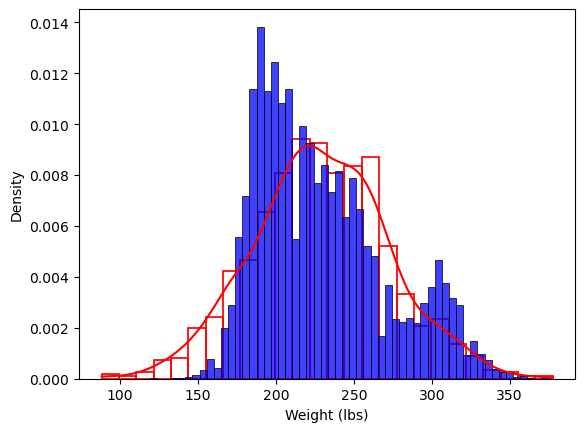

In [65]:
sns.histplot(data = nflN.rvs(1000), color = 'red', stat = 'density', kde = True, fill = False)
sns.histplot(data = nfl, color = 'blue', stat = 'density')

In [69]:
#Who's fatter than me?
empFat = (1 - nfl_cdf.Prob(225))
anFat = (1 - nflN.cdf(225))
anFat, empFat

(0.5429916955198317, 0.45145631067961167)

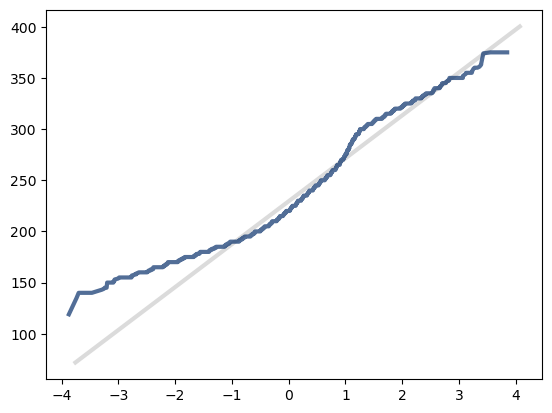

In [23]:
thinkstats2.NormalProbabilityPlot(nfl)

#### Treating Distribution as LogNormal (Skip to next section unless you're comfortable with this)

We'll look more at this soon, skip if it makes no sense. If you're comfortable, feel free to attempt. 

What if our data isn't actually normal, what if it is lognormal, how could we test that? 

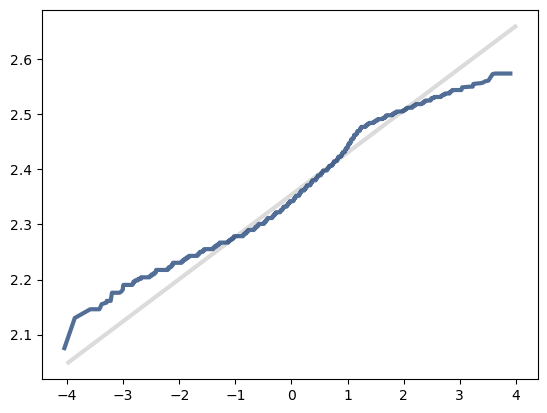

In [24]:
#LogNormal Prob Plot
thinkstats2.NormalProbabilityPlot(np.log10(nfl))

In [25]:
#Make Analytical Distribution
mu2 = nfl.mean()
sigma2 = nfl.std()
mu2, sigma2

(229.52766405427536, 41.93305341008267)

In [74]:
#Make model
lnnfl = scipy.stats.lognorm(s=sigma2, scale=math.exp(mu2))
lnnfl.rvs(1000).mean()


1.3235772582169956e+153

In [27]:
lnnfl.rvs(1000).mean()

8.004915572798223e+155

In [28]:
ln325 = lnnfl.cdf(math.exp(325))
ln265 = lnnfl.cdf(math.exp(265))
ln325,ln265, (ln325-ln265)

(0.988600315792898, 0.8012034907224885, 0.18739682507040945)

### LogNormal Distribution

We can try another one - lognormal. LogNormal distributions are commonly seen in things like income, the distributions look like a normal distribution where the peak is "squished" to the left. 

Just like with a normal distribution, we can use the properties of a lognormal distribution if our data matches that distribution pattern. So we can run similar tests to evaluate our emperical distribution against lognormal. 

We will look at the salary distribution of people in Spain.

![Log Normal](images/lognorm_norm.png "Log Normal")

### 對數正態分佈

我們可以嘗試另一個 - 對數正態分佈。 

對數正態分佈在收入等事物中很常見，分佈看起來像正態分佈，其中峰值向左“擠壓”。

就像正態分佈一樣，如果我們的數據符合該分佈模式，我們可以使用對數正態分佈的屬性。 

因此，我們可以運行類似的測試來根據對數正態評估我們的經驗分佈。

我們將看看西班牙人的工資分佈。

In [29]:
#Load and preview data
dfSP = pd.read_csv("data/spain_salary.csv")
dfSP.head()

,year,state,gender,statistic,gross_income_euros
0,2017,nationwide,both,mean,23646.50
1,2016,nationwide,both,mean,23156.34
2,2015,nationwide,both,mean,23106.30
3,2014,nationwide,both,mean,22858.17
4,2013,nationwide,both,mean,22697.86


In [30]:
#I'm going to extract the income into a Pandas Series. This is a 1D data structure
#Not much differs in using it, but we should see it, it is common
dfSP = dfSP[dfSP["statistic"] == "mean"]
spinc = pd.Series(dfSP["gross_income_euros"])
spinc

0       23646.50
1       23156.34
2       23106.30
3       22858.17
4       22697.86
          ...   
3185    23097.08
3186    23512.09
3187    23641.44
3188    23240.00
3189    22549.68
Name: gross_income_euros, Length: 540, dtype: float64

Do some basic preview stuff for a few cells....

In [31]:
spinc.describe()

count      540.000000
mean     21865.320611
std       3217.149924
min      16020.200000
25%      19344.052500
50%      21371.710000
75%      23773.370000
max      31618.970000
Name: gross_income_euros, dtype: float64

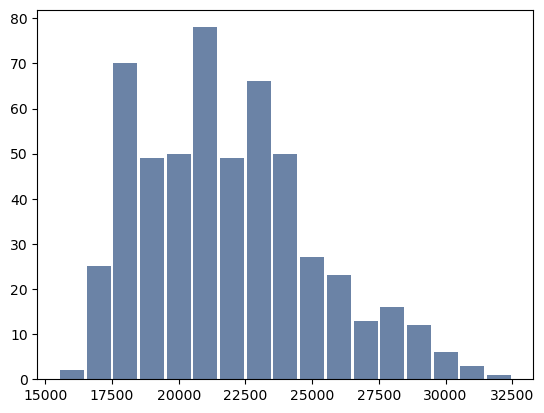

In [32]:
#Histogram
histSP = thinkstats2.Hist(round(spinc, -3))
thinkplot.Hist(histSP)
thinkplot.Config()

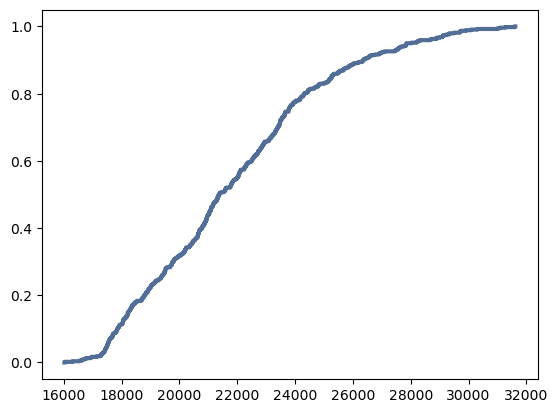

In [33]:
#CDF
cdfSP = thinkstats2.Cdf(spinc)
thinkplot.Cdf(cdfSP)
thinkplot.Config()

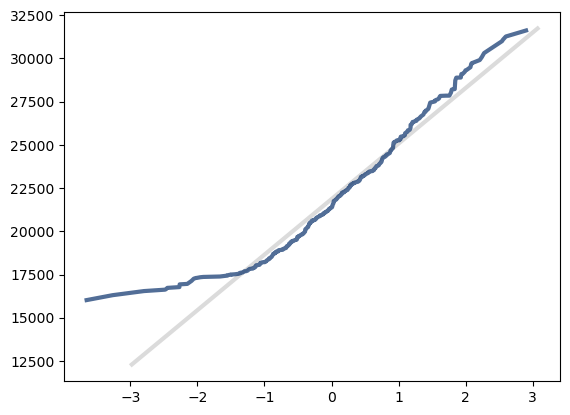

In [34]:
thinkstats2.NormalProbabilityPlot(spinc)

### LogNormal Tests

LogNormal distributions are very common, they are like a normal distribution that is "bunched up" a bit towards the left had side. We see patterns like this pretty commonly in the real world, often around things like income. 

We can do the same things that we do with a lognormal distribution, or pretty much any other distribution, that we do with a normal distribution. 

First, let's test and see if the data is normal? 

### LogNormal 測試

對數正態分佈非常常見，它們就像正態分佈，稍微向左“聚集”了一點。 

我們在現實世界中很常見這樣的模式，通常圍繞收入等事物。

我們可以做與對數正態分佈或幾乎任何其他分佈與正態分佈相同的事情。

首先我們測試一下數據是否正常？

To check and see if our distribution is lognormal, we can just take the log and see if it is normal. The log transformation basically removes the thing that separates a lognormal distribution from a normal one, we can then do "normal" stuff with the transformed data. 

The idea of doing some mathmatical transformation to the data to make it easier to analyze is common. 

要檢查我們的分佈是否符合對數正態分佈，我們可以直接獲取日誌，看看它是否正常。 

對數轉換基本上消除了將對數正態分佈與正態分佈分開的因素，然後我們可以對轉換後的數據進行“正態”處理。

對數據進行一些數學轉換以使其更易於分析的想法很常見。

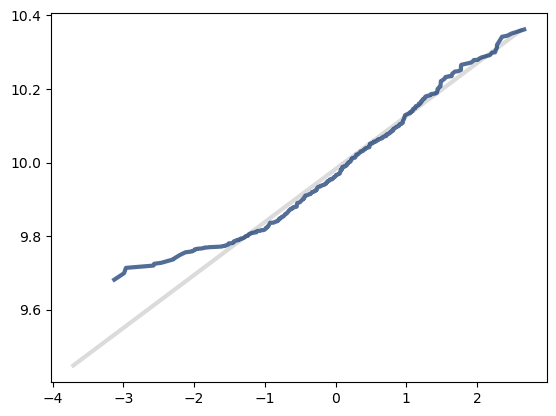

In [66]:
#Plot normal prob curve
thinkstats2.NormalProbabilityPlot(np.log(spinc))

<AxesSubplot:xlabel='gross_income_euros', ylabel='Count'>

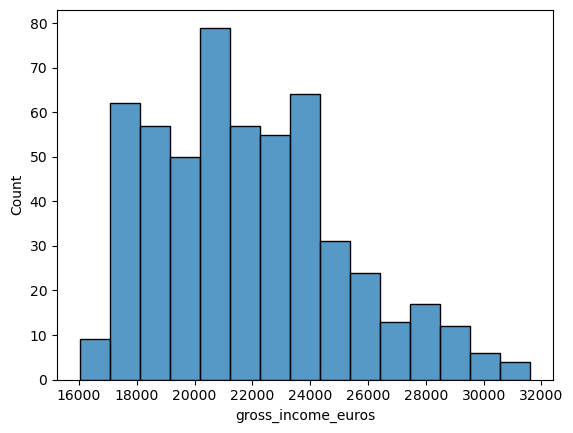

In [67]:
sns.histplot(data = spinc)

c:\Users\Elsa\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5339: RuntimeWarning: overflow encountered in exp
  return np.exp(s * random_state.standard_normal(size))


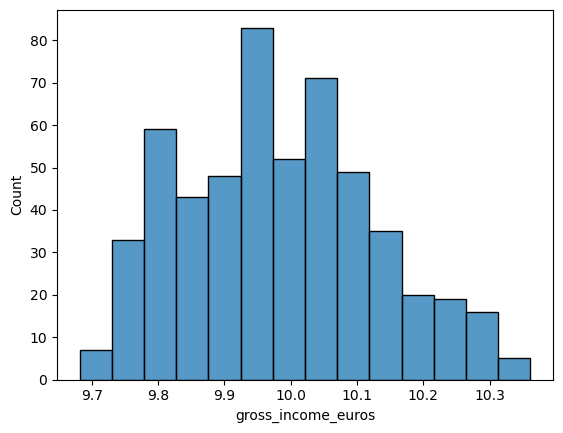

In [77]:
#sns.histplot(data = np.log(spinc), element = 'poly', fill = False)
sns.histplot(data = np.log(spinc))

mu3 = spinc.mean()
sigma3 = spinc.std()  # also: sigma1 = np.std(nfl)
log_norm = scipy.stats.lognorm(s = sigma3).rvs(1000)


How about normal?

What do these mean? 

The lognormal looks to be slightly more accurate through the curve, it is probably a better representation. We can think of the areas where it departs and try to think of what is happening there:
<ul>
<li> At the top end, the highest incomes are less than we expect from the distribution. Thinking about the scenario, this seems reasonable - salaries do tend to flatten out at some point, and many highly compensated people aren't getting massive salaries, they get things like stock options. 
<li> At the bottom end, the incomes are higher than expected. This makes sense because we normally have a minimum wage, so they lowest paid people will only get so low. 
</ul>

<b> If we were really analyzing salaries in Spain, we could consider using a log normal distribution to model the "heart" of the distribution, and look at minimum wage and high earners separately. Depending on what we are doing, this may make a lot of sense. </b>

這些是什麼意思？

通過曲線，對數正態看起來稍微更準確，它可能是更好的表示。 

我們可以想一想它離開的區域，並試著想一想那裡正在發生什麼：
<ul>
<li> 在頂端，最高收入低於我們對分配的預期。 

考慮一下這種情況，這似乎是合理的——薪水確實會在某個時候趨於平穩，

而且許多高薪人士並沒有得到高薪，他們得到的是股票期權之類的東西。

<li> 在底層，收入高於預期。 這是有道理的，因為我們通常有最低工資，

所以他們收入最低的人只會得到這麼低的工資。
</ul>

<b> 如果我們真的要分析西班牙的工資，我們可以考慮使用對數正態分佈來模擬分佈的“心臟”，

並分別查看最低工資和高收入者。 根據我們正在做的事情，這可能很有意義。 </b>

### Exercise #2 - Test this Fit

We can try another, see if the wages in this data is normal or lognormal. 

The data is total contract size, in millions, for some soccer players in Europe. 

In [83]:
df_fifa = pd.read_csv("data/fifa_eda.csv")
df_fifa = df_fifa[df_fifa["Wage"] > 5]
df_fifa = df_fifa[df_fifa["Wage"] < 100]
fifa = df_fifa["Wage"]
fifa.head()


9     94.0
41    77.0
76    21.0
77    82.0
78    73.0
Name: Wage, dtype: float64

In [84]:
fifa.describe()

count    6070.000000
mean       19.772323
std        16.683050
min         6.000000
25%         8.000000
50%        14.000000
75%        25.000000
max        99.000000
Name: Wage, dtype: float64

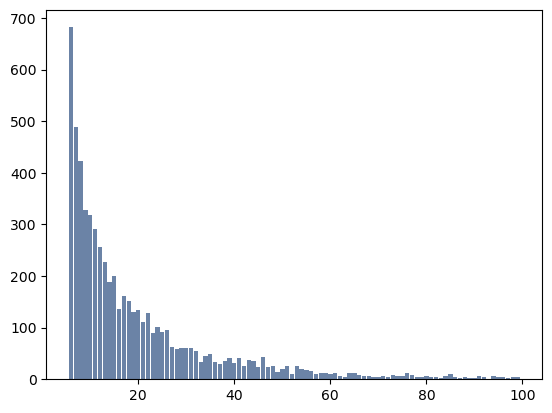

In [85]:
h = thinkstats2.Hist(fifa)
thinkplot.Hist(h)

##### Is it normal?

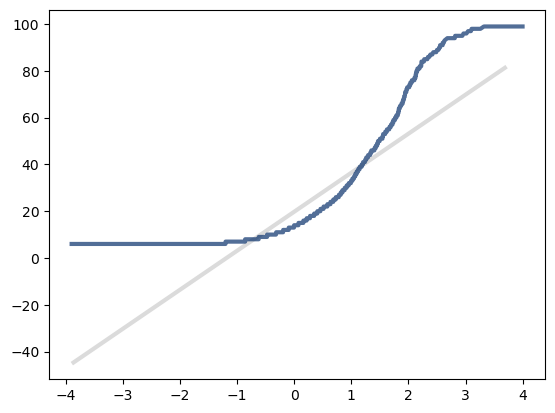

In [86]:
# try the normality test. 測試正態性檢驗
thinkstats2.NormalProbabilityPlot(fifa)

##### How About LogNormal?

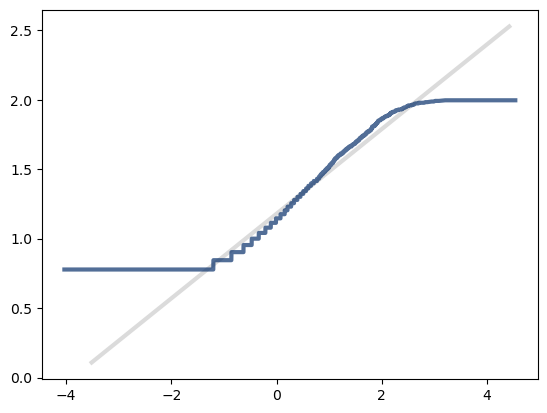

In [87]:
# try the LogNormal Test. 
thinkstats2.NormalProbabilityPlot(np.log10(fifa))

#### CDF Analytical Model Tests

The book heavily leans on performing visual tests of analytical distributions using the CDF plots. The idea here is similar to the normal probability plots, the closer we match the expected values in the model, the closer the emperical data aligns with that distribution. 

Just like with the normal plot, the grey line represents a standard analytical distribution created with the stats of our emperical data. The blue line is our actual data, and the closer the two are to each other, the better the data fits the model. 

#### CDF 分析模型測試

這本書在很大程度上依賴於使用 CDF 圖對分析分佈進行可視化測試。 

這裡的想法類似於正態概率圖，我們越接近模型中的預期值，經驗數據就越接近該分佈。

就像正態圖一樣，灰線表示使用我們的經驗數據統計創建的標準分析分佈。 

藍線是我們的實際數據，兩者越接近，數據越適合模型。

{'xscale': 'linear', 'yscale': 'linear'}

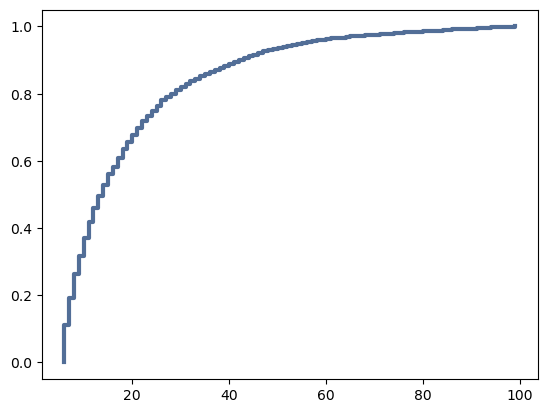

In [88]:
c = thinkstats2.Cdf(fifa)
thinkplot.Cdf(c)

In [42]:
# Create Log Transformed Data
log_wage = np.log10(fifa)
cdf_log = thinkstats2.Cdf(log_wage)

The text gives us some shortcuts to creating CDFs for analytical distributions. 

The comparison is similar to before, the more the lines match, the more our emperical data matches the analytical distribution. 

該文本為我們提供了一些為分析分佈創建 CDF 的快捷方式。

比較與之前類似，線越匹配，我們的經驗數據越匹配分析分佈。

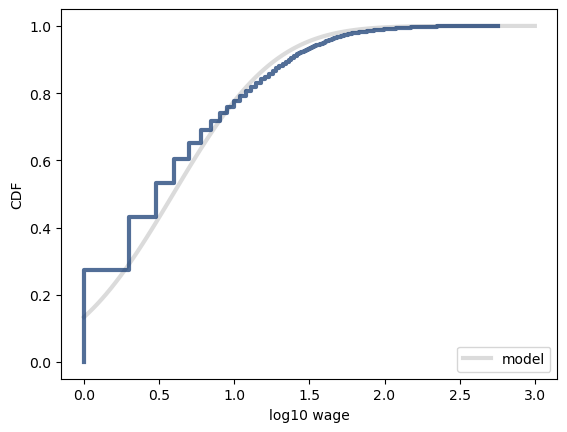

In [89]:
#Compare distribution to LogNormal
# the blue line is the actual data, the gray line is the analytical model.
mu, sigma = log_wage.mean(), log_wage.std()
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=3)
thinkplot.Plot(xs, ps, label='model', color='0.8')
thinkplot.Cdf(cdf_log) 
thinkplot.Config(xlabel='log10 wage', ylabel='CDF', loc='lower right')

#### What if we Remove Outliers

Take the big money millionaires out and see if we have a matching pattern for the bulk of the data. 

In [44]:
df_out = df_fifa[df_fifa["Wage"] < 100]
fifa_out = df_out["Wage"]

Let's check the look of it

<AxesSubplot:xlabel='Wage', ylabel='Count'>

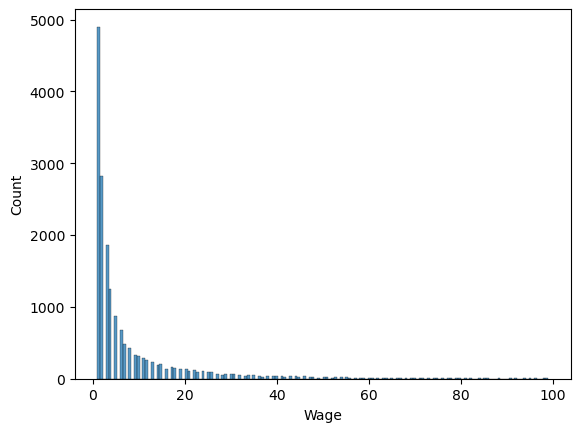

In [45]:
sns.histplot(fifa_out)

Check for normality with a probability plot.

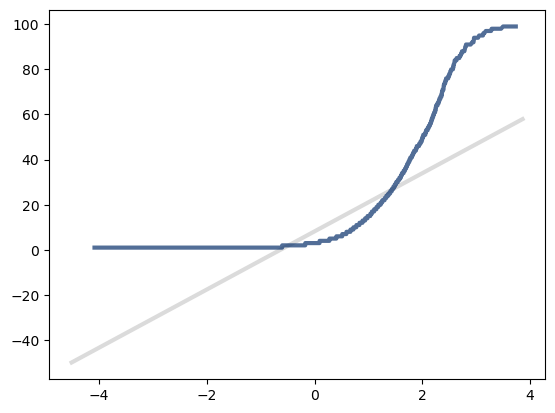

In [46]:
thinkstats2.NormalProbabilityPlot(fifa_out)

Looks bad, check for lognormal. 

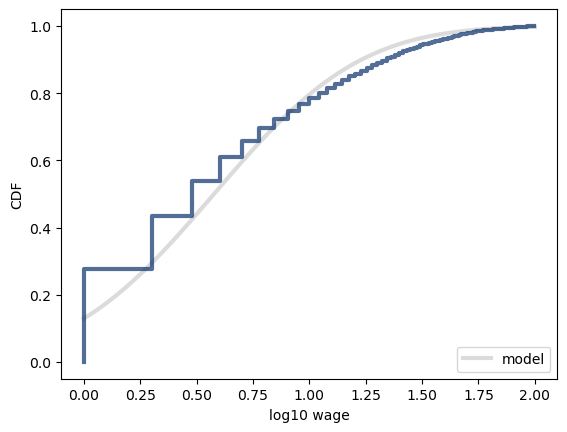

In [47]:
#Compare distribution to LogNormal
# the blue line is the actual data, the gray line is the analytical model.
log_wage_out = np.log10(fifa_out)
cdf_log_out = thinkstats2.Cdf(log_wage_out)

mu_out, sigma_out = log_wage_out.mean(), log_wage_out.std()
xs_out, ps_out = thinkstats2.RenderNormalCdf(mu_out, sigma_out, low=0, high=2)
thinkplot.Plot(xs_out, ps_out, label='model', color='0.8')
thinkplot.Cdf(cdf_log_out) 
thinkplot.Config(xlabel='log10 wage', ylabel='CDF', loc='lower right')

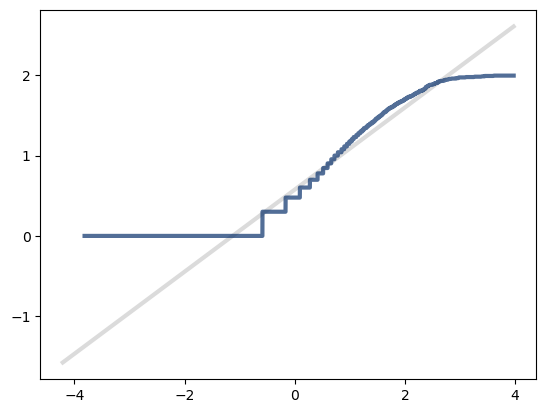

In [48]:
thinkstats2.NormalProbabilityPlot(log_wage_out)

What's the final conclusion?

It looks like at the very high end, our data is a little lower than we'd expect with a lognormal distribution (for an assorted number of sports specific reasons, this sounds at least reasonable). The primary departure is at the very low end, where the results are well above the expectation of the analytical distribution. This should make sense, if we had a real distribution, the left side of the peak would taper down. Here, in our data it doesn't, it appears to flatten out. If we look at our data, and think about the scenario, this makes sense, because there is a minimum that people are paid. The lowest paid players are likely all grouped around some "league min" (whether by rule or convention) value, rather than tapering down to 0. So these low end salaries don't decline as the "proper" distribution would. 

最後的結論是什麼？

看起來在非常高端，我們的數據比我們預期的對數正態分佈要低一些（出於各種體育特定原因，這聽起來至少是合理的）。 

主要偏離是在非常低的一端，結果遠高於分析分佈的預期。 

這應該是有道理的，如果我們有一個真實的分佈，峰值的左側會逐漸減小。 

在這裡，在我們的數據中它沒有，它似乎變平了。 

如果我們查看我們的數據並考慮這種情況，這是有道理的，因為人們的報酬是最低的。 

收入最低的球員可能都圍繞著一些“聯盟最低”（無論是根據規則還是慣例）價值分組，而不是逐漸下降到 0。

因此這些低端工資不會像“適當”分配那樣下降。

<AxesSubplot:xlabel='Wage', ylabel='Count'>

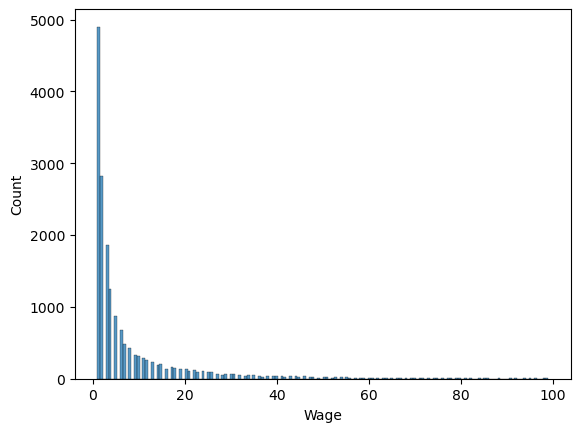

In [49]:
sns.histplot(fifa_out)